In [40]:
import numpy as np
import pandas as pd
from urllib import *
import matplotlib.pyplot as plt

In [41]:
url = 'https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [42]:
df.shape

(100, 4)

In [43]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split / cross validation
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [44]:
df = df.iloc[:, 1:]

In [45]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


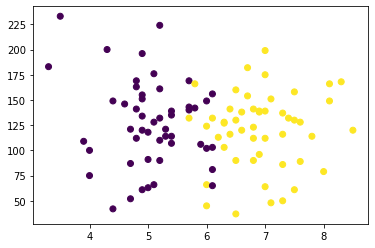

In [46]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])
plt.show()

In [47]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [48]:
y.shape

(100,)

In [49]:
# Train Test split
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1)                 # test_size means how much data given in training and testing, .1 its means 

In [51]:
y_train

48    1
51    0
96    0
29    1
19    0
     ..
57    1
70    1
72    1
2     0
49    0
Name: placement, Length: 90, dtype: int64

In [52]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_train

array([[ 0.53750127,  0.34197805],
       [-1.03709558,  0.41759973],
       [-1.38700599, -2.07791576],
       [ 0.88741168, -0.31340986],
       [-0.68718517,  0.19073469],
       [-1.12457318, -1.82584349],
       [-0.16231955,  0.44280696],
       [ 1.5872325 , -0.2629954 ],
       [-2.34925962,  1.47630327],
       [-0.94961798,  1.80399723],
       [ 0.45002367, -0.86796886],
       [ 2.02462052,  1.09819487],
       [ 0.71245648,  0.41759973],
       [-1.7369164 , -0.61589659],
       [ 0.62497887,  0.74529368],
       [-1.7369164 , -1.24607727],
       [-1.03709558,  0.97215873],
       [-0.94961798, -1.59897845],
       [ 0.45002367, -2.2039519 ],
       [ 0.45002367,  0.89653705],
       [ 1.76218771, -1.14524836],
       [ 0.01263565, -0.01092313],
       [ 0.79993408,  0.34197805],
       [ 0.01263565, -0.56548213],
       [ 0.97488928, -1.9266724 ],
       [-0.24979715,  0.19073469],
       [ 0.88741168,  1.27464546],
       [ 0.01263565, -1.47294231],
       [-0.24979715,

In [56]:
X_test = scaler.transform(X_test)

In [57]:
X_test

array([[ 0.10011326, -1.0948339 ],
       [ 0.01263565, -2.00229408],
       [ 1.23732209,  0.19073469],
       [-1.824394  , -0.38903154],
       [ 0.97488928,  0.669672  ],
       [-0.16231955,  1.04778041],
       [-1.21205078,  0.54363587],
       [-0.07484195, -0.46465322],
       [ 0.10011326, -1.49814954],
       [ 1.3247997 ,  0.84612259]])

In [58]:
# Train model - use logistic regressor
from sklearn.linear_model import LogisticRegression

In [59]:
clf = LogisticRegression()

In [60]:
clf.fit(X_train, y_train)

LogisticRegression()

In [61]:
# model evaluation - find accuray
ypred = clf.predict(X_test)

In [62]:
y_test

78    0
10    1
3     1
31    0
21    1
85    1
39    0
1     0
56    0
91    1
Name: placement, dtype: int64

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test, ypred)

0.7

In [72]:
from mlxtend.plotting import plot_decision_regions

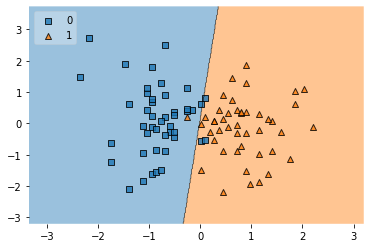

In [74]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)
plt.show()

In [76]:
# import pickle
# pickle.dump(clf,open('model.pkl', 'wb'))